### Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [46]:
data = pd.read_csv('baseball.csv')

In [47]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


### column name  - 
- W - winner W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)

- R - Runs scored: number of times a player crosses home plate

- AB - At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

- H  Hits allowed: total hits allowed

- 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error

- 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error

- HR (or HRA) – Home runs allowed: total home runs allowed

- BB - Base on balls (also called a "walk"): times pitching four balls, allowing the batter to take first base

- SO -  number of batters who received strike three

- SB -  Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

- RA - Run average: number of runs allowed times nine divided by innings pitched

- ER - Earned run: number of runs that did not occur as a result of errors or passed balls

- ERA - Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

- CG - Caught stealing: times tagged out while attempting to steal a base

- SHO -  Shutout: number of complete games pitched with no runs allowed

- SV -  Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

- E - Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

In [48]:
data.describe() ### Statistics description

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [49]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [50]:
data.shape

(30, 17)

##### 

#### There is no missing values in the dataset

In [51]:
import warnings
warnings.filterwarnings('ignore')

### EDA(Exploratary data analysis)

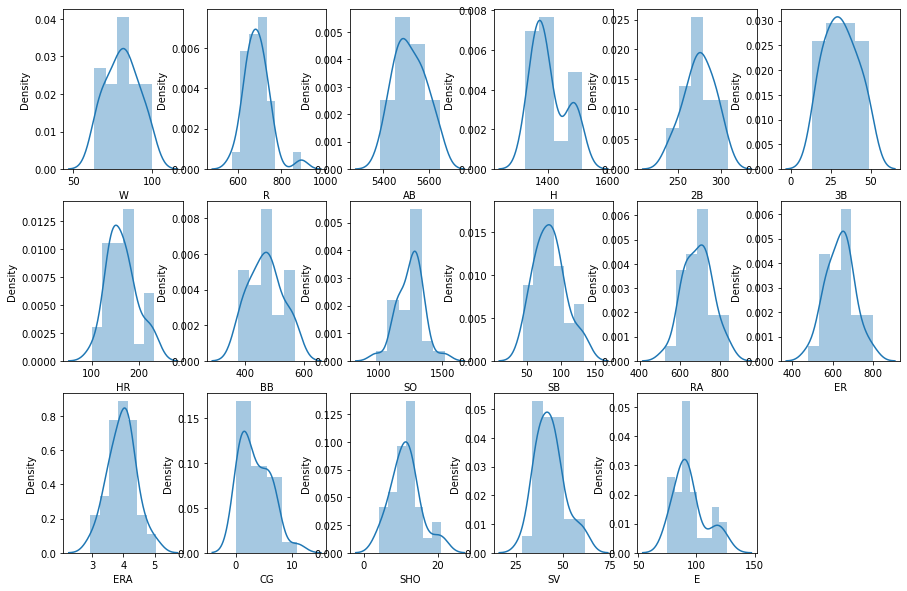

In [52]:
plt.figure(figsize=(15,10))
plotnumber=1

for column in data:
    if plotnumber<=18: #as there are 12 columns in data
        ax=plt.subplot(3,6,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber +=1
plt.show()

In [53]:
abs(data.corr()['W']).sort_values(ascending=False)

W      1.000000
ERA    0.819600
RA     0.812952
ER     0.809435
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
3B     0.251118
SB     0.157234
SO     0.111850
E      0.089485
AB     0.087947
CG     0.080533
H      0.037612
Name: W, dtype: float64

<AxesSubplot:title={'center':'Correlation with Win'}>

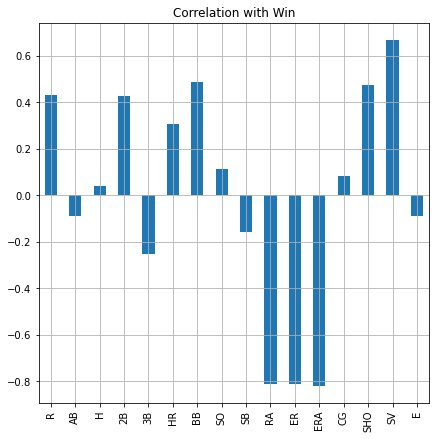

In [54]:
# visualize the correlation
data.drop('W', axis =1).corrwith(data['W']).plot(kind ='bar',grid = True, figsize = (7,7),
                                                   title = 'Correlation with Win')

#### AS we can see the corelation of features and label,
now plotting heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

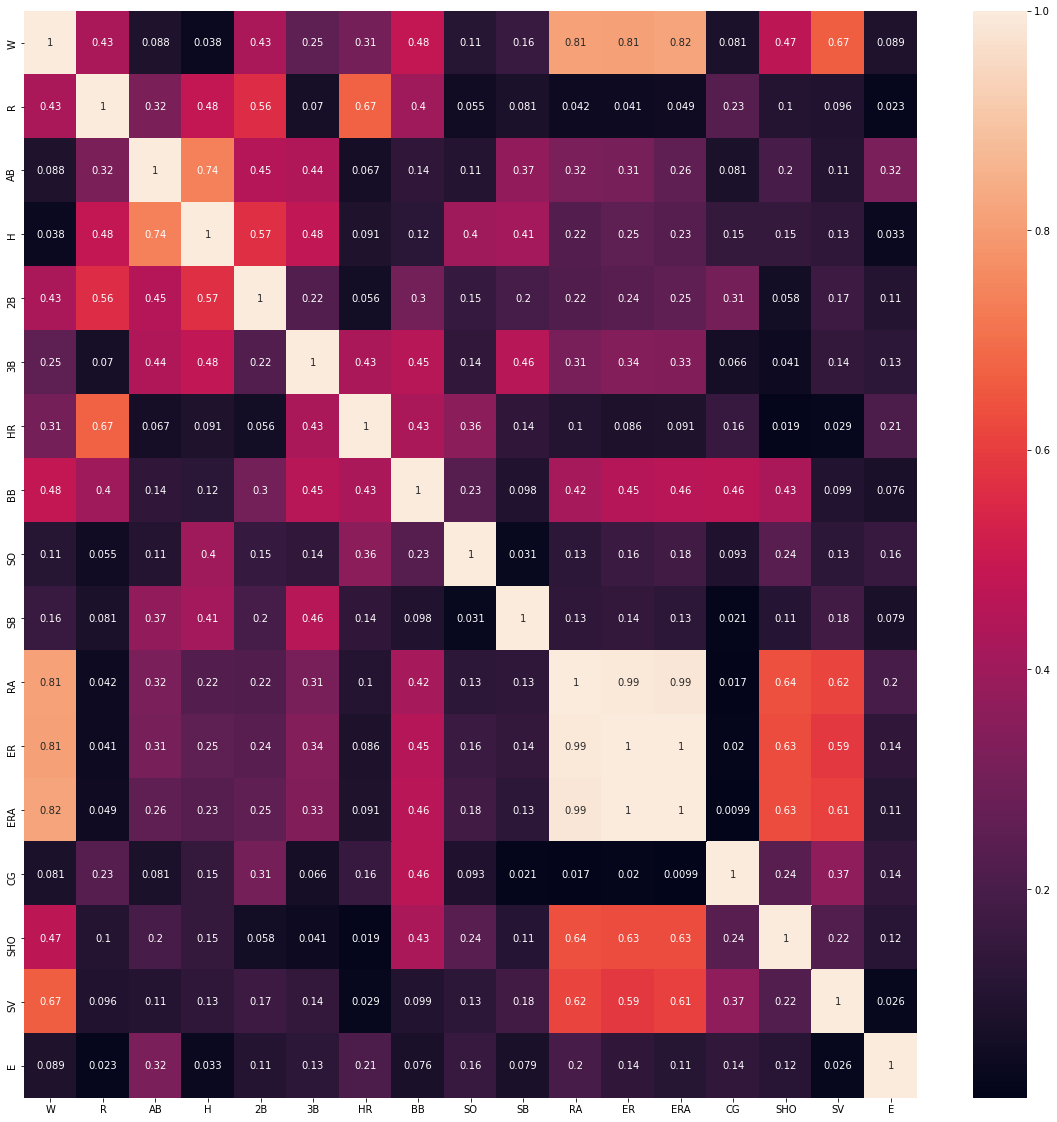

In [55]:
### plotting heatmap
plt.figure(figsize=(20,20))
sns.heatmap(abs(data.corr()),annot=True)
plt.show

### there can be problem of multicolinearity we will check it by vif value and also see trends 

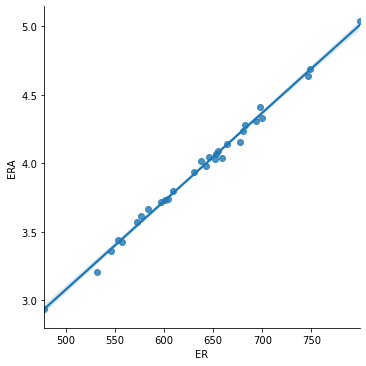

In [56]:
sns.lmplot(y='ERA',x='ER',data=data)

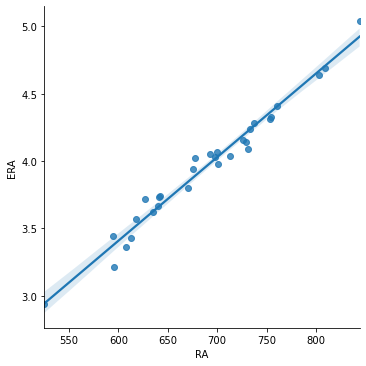

In [57]:
sns.lmplot(y='ERA',x='RA',data=data)

#### seems they are following some trend we will cross check it by vif value before removing any column

#### checking for outliers

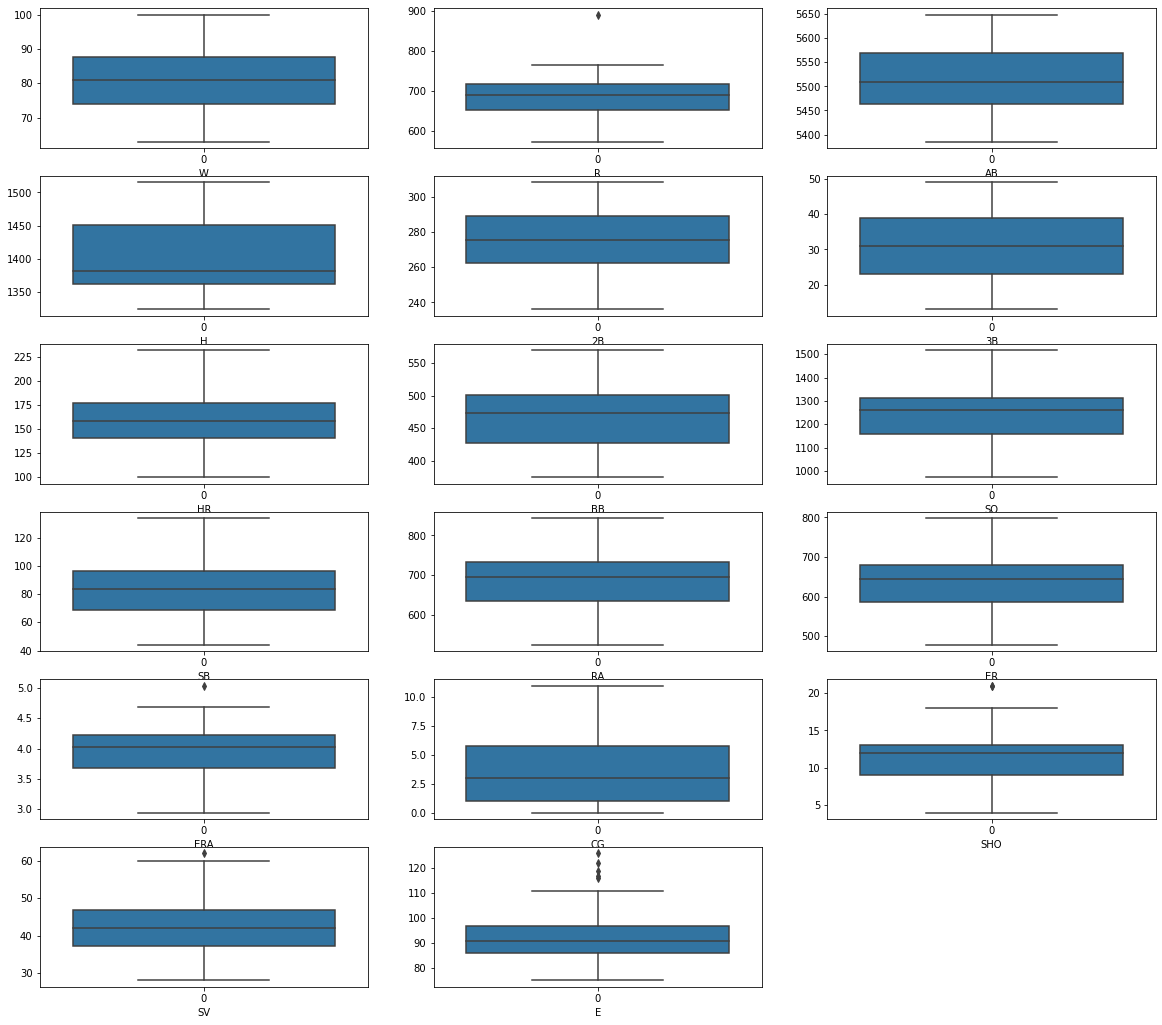

In [58]:
plt.figure(figsize=(20,18))
graph=1

for column in data:
    if graph<=18:
        ax=plt.subplot(6,3,graph)
        sns.boxplot(data = data[column],orient="v")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

#### there are outliers in 
- R
- ERA
- SHO
- SV
- E

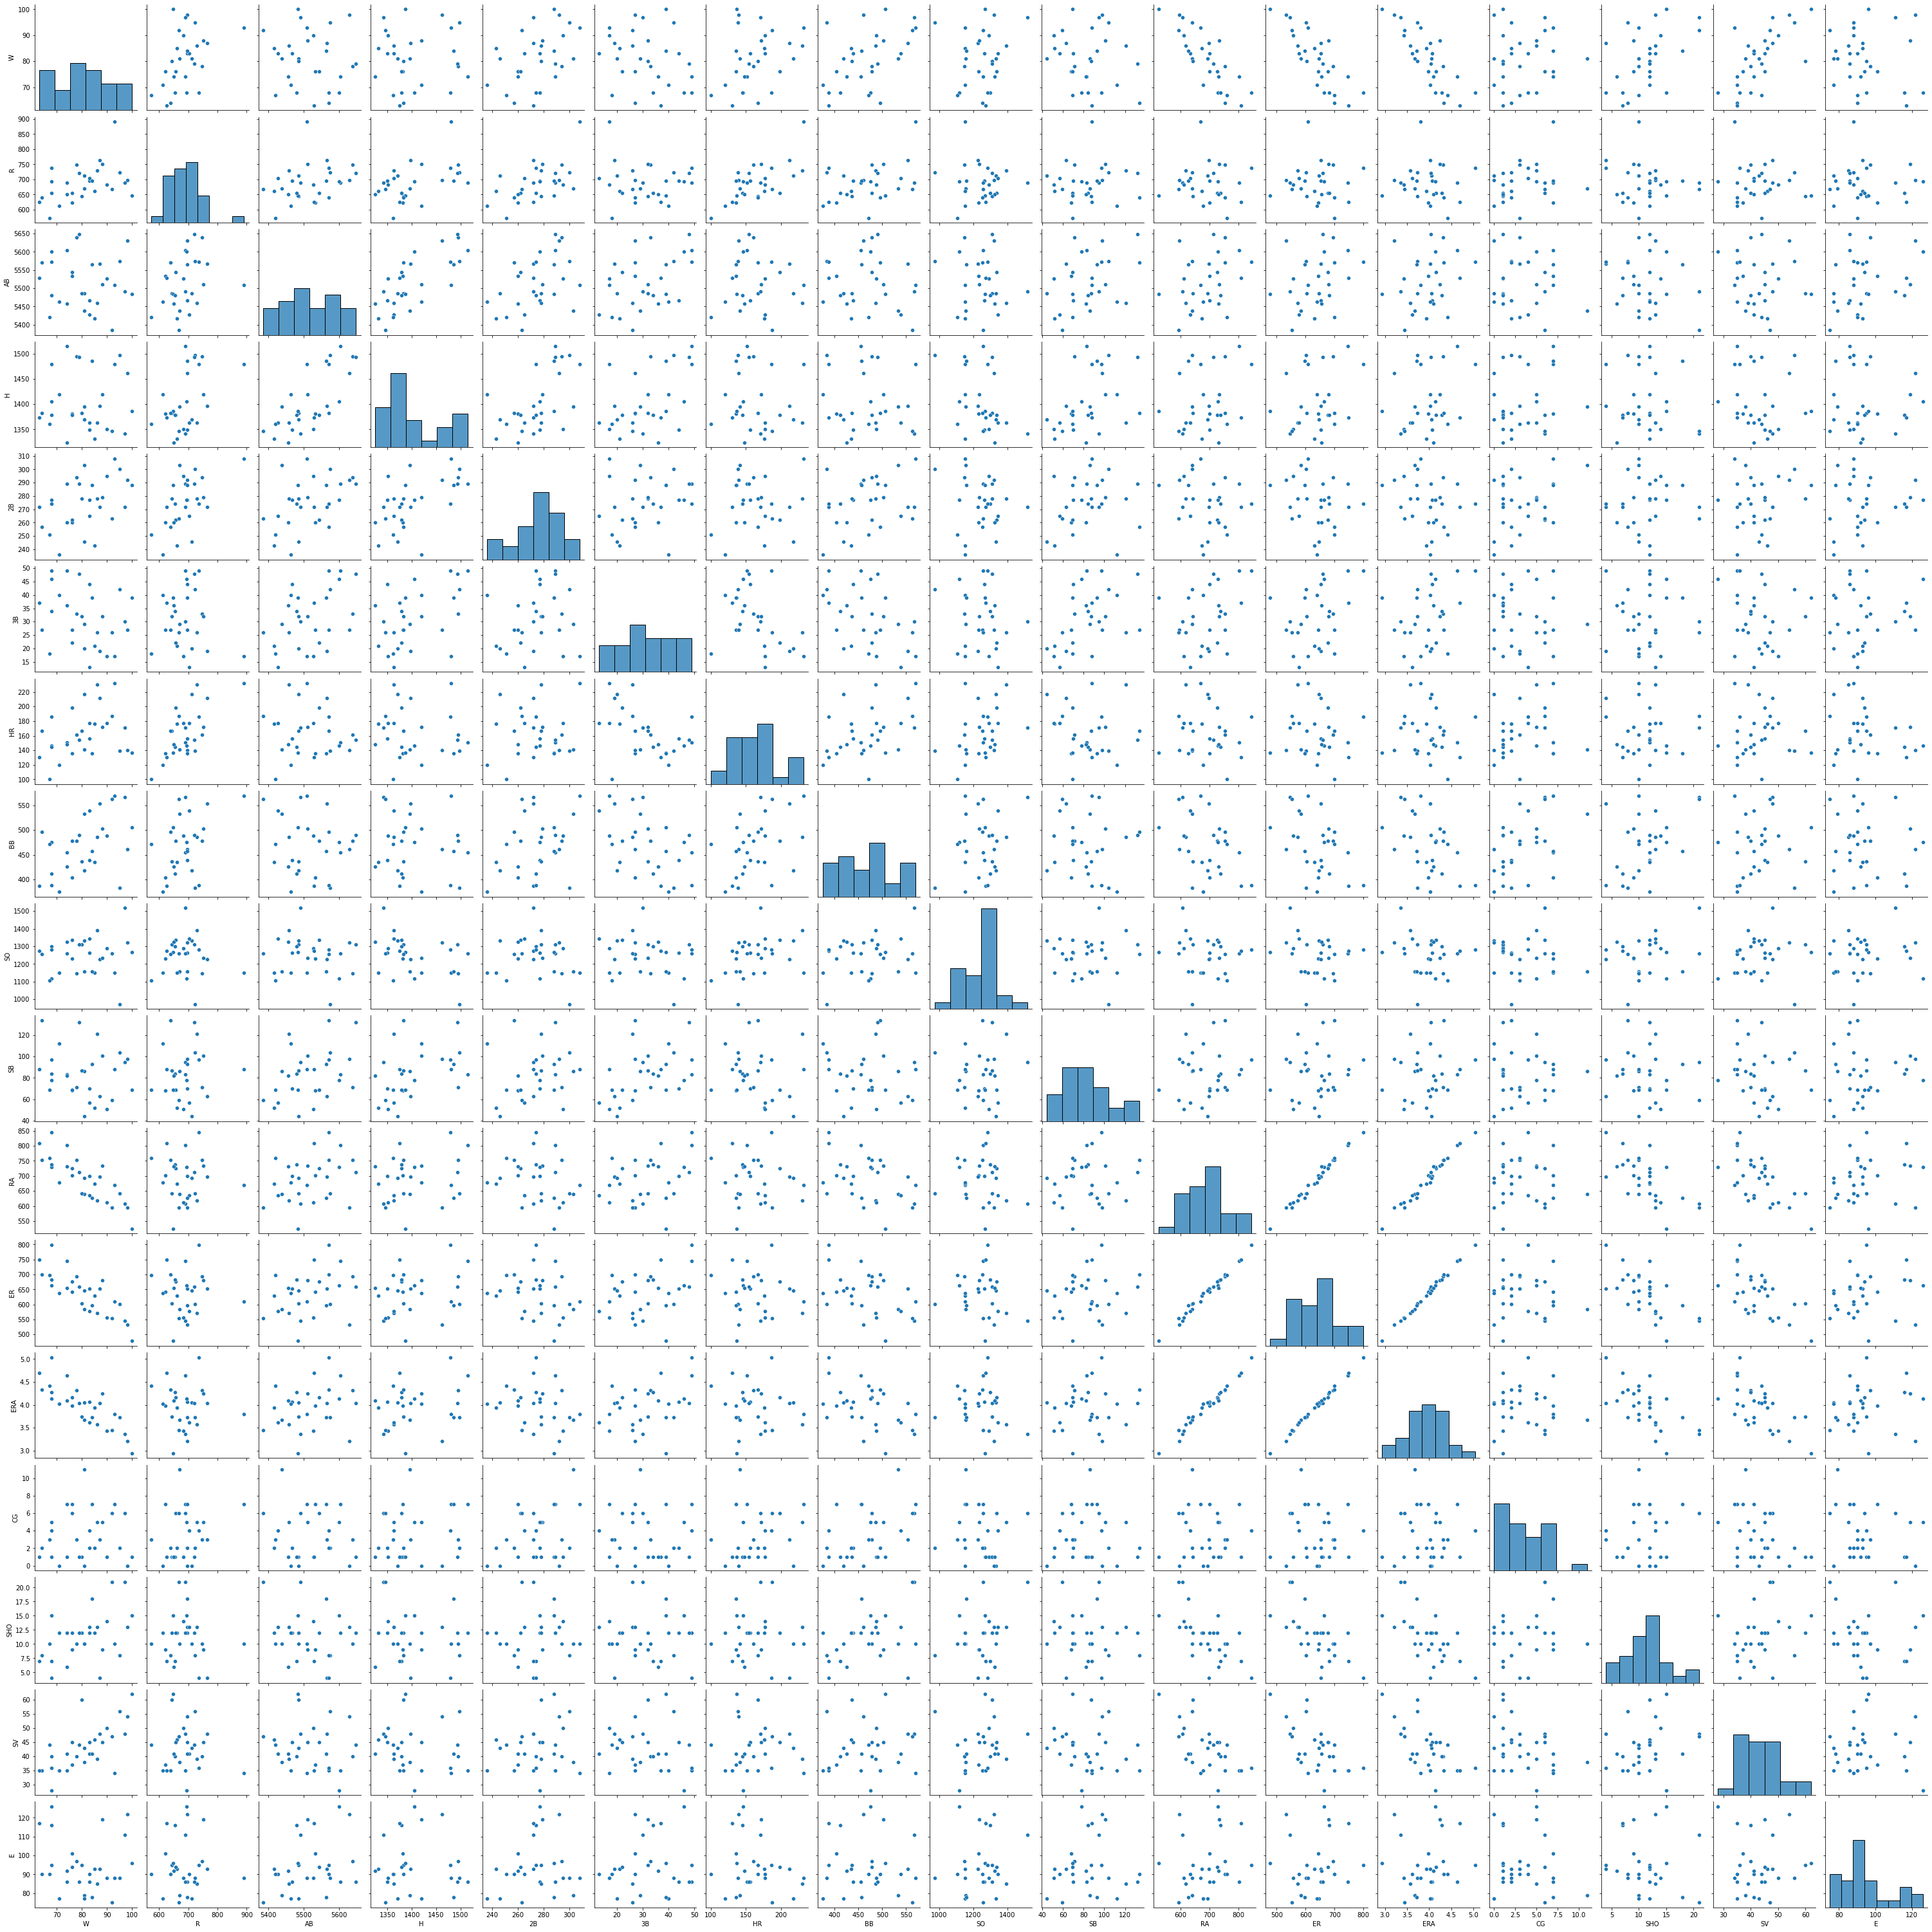

In [59]:
sns.pairplot(data)

### it will be taken care by Data normalization

### Data normalization
##### Removing skewness(power transformer)

In [60]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [61]:
features = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
data[features]  = pt.fit_transform(data[features].values)
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,0.0,0.0,0.0,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.660331,-0.497425,-0.500893,-0.359844,-0.789579,1.546378,-0.334953
1,83,0.0,0.0,0.0,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.175465,0.257974,0.261806,-0.359844,0.251775,0.360444,-0.532211
2,81,0.0,0.0,0.0,1.670782,-0.160270,-0.689676,1.128294,-0.901254,0.211956,-0.674621,-0.746906,-0.636459,1.993513,-0.245393,-0.607594,-1.342331
3,76,0.0,0.0,0.0,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,-0.642564,0.189512,0.113575,0.060804,1.220103,-0.510759,-0.764453,0.678524
4,74,0.0,0.0,0.0,0.792183,1.616444,-0.329850,-0.206771,0.085459,0.079629,1.603228,1.582654,1.520959,1.220103,0.251775,-1.095010,-0.532211


Seeing data distribution again,

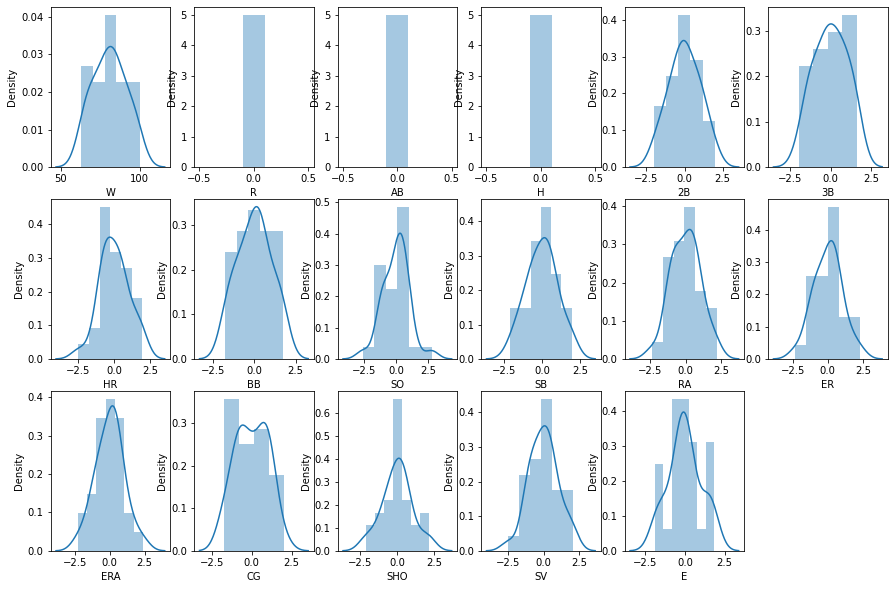

In [62]:
plt.figure(figsize=(15,10))
plotnumber=1

for column in data:
    if plotnumber<=18: #as there are 12 columns in data
        ax=plt.subplot(3,6,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber +=1
plt.show()

In [63]:
X = data.drop(columns = ['W'],axis=1)
y = data['W']

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled[1]

array([ 0.        ,  0.        ,  0.        ,  0.08426878,  1.2033202 ,
       -0.15858141, -0.50274883,  0.13491294, -0.53969308,  0.17546536,
        0.25797351,  0.26180619, -0.35984364,  0.25177537,  0.36044386,
       -0.53221128])

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns

# lets check the vif
vif

,vif,Features
0,NaN,R
1,NaN,AB
2,NaN,H
3,2.221041,2B
4,2.697792,3B
5,2.867884,HR
6,3.331177,BB
7,2.321817,SO
8,1.888334,SB
9,177.760829,RA


### removing column RA and ER due to the fact the vif>5 and contributing in same trends as ERA but ERA has more contibution to W soo,droping RA and ER

In [68]:
data.drop(columns=['RA','ER'],axis=1,inplace=True)

In [70]:
data.shape

(30, 15)

### Modelling 

In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,SCORERS
from sklearn.model_selection import train_test_split

In [74]:
!pip install scikit-plot
import scikitplot as skplt

In [75]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train) 
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"model perform very well")
        print("At random state",i)
        print('Training accuracy score is',r2_score(y_train,pred_train)*100)
        print('Testing accuracy score is',r2_score(y_test,pred_test)*100)
        

At random state 349 model perform very well
At random state 349
Training accuracy score is 86.8485804905106
Testing accuracy score is 86.84292025690166


### RANDOM STATE = 349

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=349)

86.84292025690166
2.6432447474696232
RMSE : 3.45808091124646


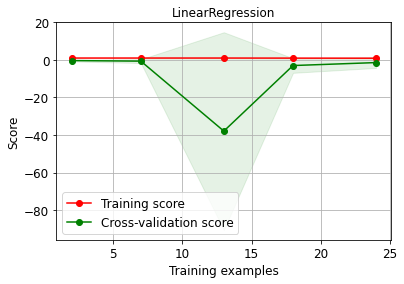

None


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(lr,X,y,cv=5,scoring='r2',text_fontsize='large',title='LinearRegression')
print(plt.show())


73.32915227660276
4.094278919595863
RMSE : 4.9234984668468496


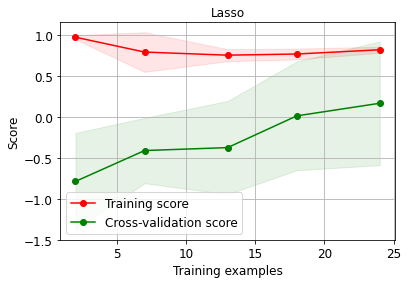

None


In [98]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
las = Lasso()
las.fit(x_train,y_train)
pred = las.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(las,X,y,cv=5,scoring='r2',text_fontsize='large',title='Lasso')
print(plt.show())

77.61628084480773
3.607241029695274
RMSE : 4.510467119064681


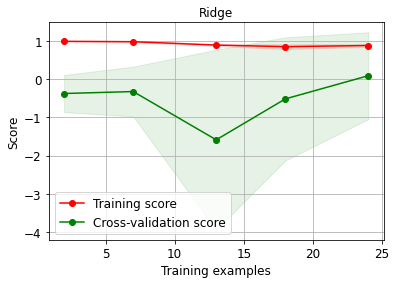

None


In [99]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
ridge = Ridge()
ridge.fit(x_train,y_train)
pred = ridge.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(ridge,X,y,cv=5,scoring='r2',text_fontsize='large',title='Ridge')
print(plt.show())

58.66104523227382
4.758333333333333
RMSE : 6.129642458305923


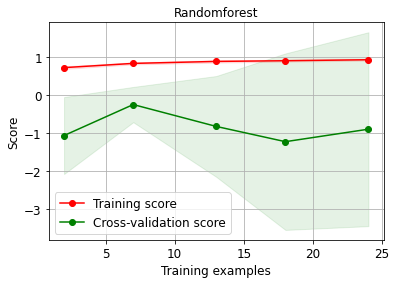

None


In [100]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(rf,X,y,cv=5,scoring='r2',text_fontsize='large',title='Randomforest')
print(plt.show())

45.50634123836671
5.694289715293752
RMSE : 7.0376616118815445


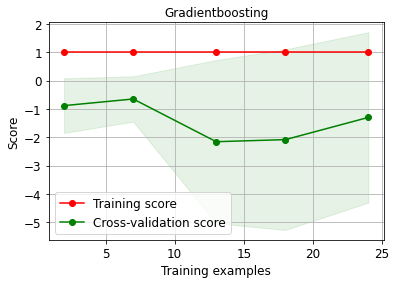

None


In [101]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(gb,X,y,cv=5,scoring='r2',text_fontsize='large',title='Gradientboosting')
print(plt.show())

44.73039584094652
5.765835387955842
RMSE : 7.0875897957945355


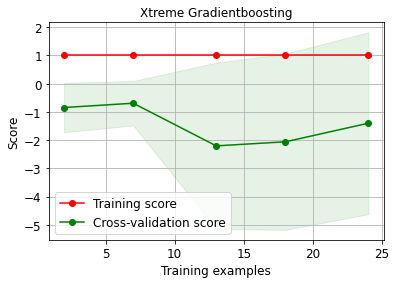

None


In [102]:
from xgboost import XGBRegressor
xgbt = GradientBoostingRegressor()
xgbt.fit(x_train,y_train)
pred = xgbt.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(xgbt,X,y,cv=5,scoring='r2',text_fontsize='large',title='Xtreme Gradientboosting')
print(plt.show())

4.183141491691855
7.514510467653527
RMSE : 7.0875897957945355


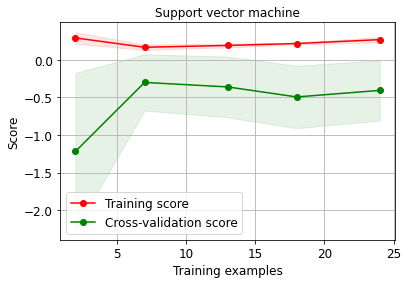

None


In [103]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
print(r2_score(y_test,pred_svr)*100)
print(mean_absolute_error(y_test,pred_svr))
mse = mean_squared_error(y_test,pred)
print('RMSE :', np.sqrt(mse))
skplt.estimators.plot_learning_curve(svr,X,y,cv=5,scoring='r2',text_fontsize='large',title='Support vector machine')
print(plt.show())

#### Gridsearchvcv

In [111]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [115]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
from sklearn.model_selection import GridSearchCV

params = {"fit_intercept": [True, False],
          'copy_X':[True,False]
         }
GCV = GridSearchCV(lr,params,cv=5)

GCV.fit(x_train,y_train)  #fitting the data in model
GCV.best_params_          #printing the best parameter found by Gridsearchcv
GCV_pred = GCV.best_estimator_.predict(x_test) #predicting with best parameter 
print(GCV.best_estimator_)        
#checking final accuracy
print('\nR2_score =>','\n',r2_score(y_test,GCV_pred))
print('\nmean absolute error =>','\n',mean_absolute_error(y_test,GCV_pred))
mse = mean_squared_error(y_test,GCV_pred)
print('RMSE :', np.sqrt(mse))

LinearRegression()

R2_score => 
 0.8684292025690167

mean absolute error => 
 2.6432447474696232
RMSE : 3.45808091124646


### As RMSE Value decreases this are our best parameter

In [116]:
import joblib
joblib.dump(GCV.best_estimator_,'Baseball.pkl')

['Baseball.pkl']

In [117]:
model=joblib.load("E:\Datatrained projects\Datatrained-projects\Baseball\Baseball.pkl")
y_preds=model.predict(x_test)
predicted=pd.DataFrame(y_preds,columns=['predicted'])
predicted

,predicted
0,82.516982
1,83.409224
2,93.414562
3,81.619746
4,60.830130
5,74.407827
